## Adjusting the Risk Assessment for better input into DIGNAD

In [15]:
# Standard libraries
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Going to make sure we can load all the custom scripts from the directory
scripts_dir = r"C:\Users\Mark.DESKTOP-UFHIN6T\Projects\sovereign-risk-THA\scripts\analysis"
# Add scripts directory to sys.path
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)

In [17]:
from model_dependence import model_dependence
from analysis_functions import basin_loss_curve, d_interpolate_damages, get_copula_model, generate_conditional_sample

In [ ]:
clayton_copula_models, ordered_basins = model_dependence()

##### Step 1: Load risk data and prepare for analysis

In [4]:
# Load risk data
risk_data_file = r"D:\projects\sovereign-risk\Thailand\analysis\flood\risk_analysis\dignad\exposure\risk_basin_zonal_sum.csv"
risk_data = pd.read_csv(risk_data_file)
# Add columne for annual exceedance probability
risk_data['AEP'] = 1 / risk_data['RP']
# Add a column converting current prorection level into AEP
risk_data['Pr_L_AEP'] = np.where(risk_data['Pr_L'] == 0, 0, 1 / risk_data['Pr_L']) # using numpy where avoids zero division errors
# Thailand capital stock data
capital_stock_file = r"D:\projects\sovereign-risk\Thailand\data\exposure\THA_net_capital_stock_2022.csv"
capital_stock = pd.read_csv(capital_stock_file)
total_capital_stock = capital_stock['net_capital_stock_m_baht'].sum()
public_capital_stock = capital_stock['Public'].sum()
private_capital_stock = capital_stock['Private'].sum()
tradable_capital_stock = capital_stock['Tradable'].sum()
non_tradable_capital_stock = capital_stock['Non-Tradable'].sum()
residential_capital_stock = capital_stock[capital_stock['Urban_Class']=='Residential']['net_capital_stock_m_baht'].sum()
commercial_capital_stock = capital_stock[capital_stock['Urban_Class']=='Commercial']['net_capital_stock_m_baht'].sum()
industrial_capital_stock = capital_stock[capital_stock['Urban_Class']=='Industrial']['net_capital_stock_m_baht'].sum()
infrastructure_capital_stock = capital_stock[capital_stock['Urban_Class']=='Infrastructure']['net_capital_stock_m_baht'].sum()
private_residential_capital_stock = capital_stock[capital_stock['Urban_Class']=='Residential']['Private'].sum()
private_commercial_capital_stock = capital_stock[capital_stock['Urban_Class']=='Commercial']['Private'].sum()
private_industrial_capital_stock = capital_stock[capital_stock['Urban_Class']=='Industrial']['Private'].sum()
private_infrastructure_capital_stock = capital_stock[capital_stock['Urban_Class']=='Infrastructure']['Private'].sum()
public_residential_capital_stock = capital_stock[capital_stock['Urban_Class']=='Residential']['Public'].sum()
public_commercial_capital_stock = capital_stock[capital_stock['Urban_Class']=='Commercial']['Public'].sum()
public_industrial_capital_stock = capital_stock[capital_stock['Urban_Class']=='Industrial']['Public'].sum()
public_infrastructure_capital_stock = capital_stock[capital_stock['Urban_Class']=='Infrastructure']['Public'].sum()
tradable_residential_capital_stock = capital_stock[capital_stock['Urban_Class']=='Residential']['Tradable'].sum()
tradable_commercial_capital_stock = capital_stock[capital_stock['Urban_Class']=='Commercial']['Tradable'].sum()
tradable_industrial_capital_stock = capital_stock[capital_stock['Urban_Class']=='Industrial']['Tradable'].sum()
tradable_infrastructure_capital_stock = capital_stock[capital_stock['Urban_Class']=='Infrastructure']['Tradable'].sum()
non_tradable_residential_capital_stock = capital_stock[capital_stock['Urban_Class']=='Residential']['Non-Tradable'].sum()
non_tradable_commercial_capital_stock = capital_stock[capital_stock['Urban_Class']=='Commercial']['Non-Tradable'].sum()
non_tradable_industrial_capital_stock = capital_stock[capital_stock['Urban_Class']=='Industrial']['Non-Tradable'].sum()
non_tradable_infrastructure_capital_stock = capital_stock[capital_stock['Urban_Class']=='Infrastructure']['Non-Tradable'].sum()

In [5]:
risk_data

,Unnamed: 0,FID,GID_1,NAME,HB_L4,HB_L5,HB_L6,HB_L7,Pr_L,Add_Pr,New_Pr_L,damages,epoch,adaptation_scenario,RP,urban_class,AEP,Pr_L_AEP
0,0,0,THA.62_1,Si Sa Ket,4.041145e+09,4.051145e+09,4.061140e+09,4.071125e+09,16.387501,83.612499,100.0,0.000000e+00,Today,Baseline,2,Residential,0.5,0.061022
1,1,1,THA.62_1,Si Sa Ket,4.041145e+09,4.051145e+09,4.061140e+09,4.071125e+09,16.387501,83.612499,100.0,0.000000e+00,Today,Baseline,2,Residential,0.5,0.061022
2,2,2,THA.62_1,Si Sa Ket,4.041145e+09,4.051145e+09,4.061131e+09,4.071121e+09,16.387501,83.612499,100.0,0.000000e+00,Today,Baseline,2,Residential,0.5,0.061022
3,3,3,THA.62_1,Si Sa Ket,4.041109e+09,4.051109e+09,4.061109e+09,4.071109e+09,16.387501,83.612499,100.0,3.405515e-07,Today,Baseline,2,Residential,0.5,0.061022
4,4,4,THA.62_1,Si Sa Ket,4.041109e+09,4.051110e+09,4.061110e+09,4.071111e+09,16.387501,83.612499,100.0,7.807593e-06,Today,Baseline,2,Residential,0.5,0.061022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26944,26944,686,THA.33_1,Narathiwat,4.040018e+09,4.050018e+09,4.060019e+09,4.070020e+09,0.000000,100.000000,100.0,2.324781e-03,Exposure,Exposure,0,Roads_Proportional_Length,inf,0.000000
26945,26945,687,THA.33_1,Narathiwat,4.040018e+09,4.050018e+09,4.060019e+09,4.070020e+09,0.000000,100.000000,100.0,3.403044e-03,Exposure,Exposure,0,Roads_Proportional_Length,inf,0.000000
26946,26946,688,THA.33_1,Narathiwat,4.040018e+09,4.050018e+09,4.060019e+09,4.070020e+09,0.000000,100.000000,100.0,3.057595e-03,Exposure,Exposure,0,Roads_Proportional_Length,inf,0.000000
26947,26947,689,THA.33_1,Narathiwat,4.040018e+09,4.050018e+09,4.060020e+09,4.071161e+09,0.000000,100.000000,100.0,0.000000e+00,Exposure,Exposure,0,Roads_Proportional_Length,inf,0.000000


In [6]:
def monte_carlo_dependence_simulation(loss_df, residential_capital_stock, commercial_capital_stock, industrial_capital_stock, infrastructure_capital_stock,
                                      rps, basin_col, epoch_val, scenario_val, protection_level, num_years, ordered_basins, copula_models, num_simulations=10000):
    '''
    Perform Monte Carlo simulations of yearly losses incorporating basin dependencies.

    :param loss_df: dataframe with losses from risk analysis
    :param rps: list of return periods to consider. 
    :param basin_col: name of column for basins (e.g. 'HB_L6')
    :param epoch_val: name of epoch value (e.g. 'Today')
    :param scenario_val: name of scenario (e.g. 'Baseline')
    :param urban_class: name of urban class to consider (e.g. 'Residential')
    :param protection_level: what is the baseline protection level (e.g. 0.5 or 1 in 2 years)
    :param num_years: Number of years to simulate
    :param ordered_basins: List of basin IDs ordered by dependency
    :param copula_models: Dictionary holding copula model for each basin pair
    :param num_simulations: Number of simulations (default is 10,000).
    :return: Dataframe of simulated national losses for each year.
    '''

    urban_classes = ['Residential', 'Commercial', 'Industrial', 'Infrastructure']
    
    # To speed up the Monte-Carlo simulation we are going to pre-compute some variables
    # precompute loss-probability curves for each basin and pull exposure values for each urban class
    basin_loss_curves = {}
    basin_p_exposures = {}
    for basin_id in ordered_basins:
        basin_loss_curves[basin_id] = {}
        basin_p_exposures[basin_id] = {}
        for urban_class in urban_classes:
            basin_loss_curves[basin_id][urban_class] = basin_loss_curve(loss_df, basin_id, basin_col, epoch_val, scenario_val, urban_class, rps)
        basin_p_exposures[basin_id]['Residential'] = loss_df[(loss_df[basin_col] == basin_id) & (loss_df['urban_class'] == 'Residential_Proportional_Area')]['damages'].sum()
        basin_p_exposures[basin_id]['Commercial'] = loss_df[(loss_df[basin_col]==basin_id) & (loss_df['urban_class']=='Non-Residential_Proportional_Area')]['damages'].sum()
        basin_p_exposures[basin_id]['Industrial'] = loss_df[(loss_df[basin_col]==basin_id) & (loss_df['urban_class']=='Non-Residential_Proportional_Area')]['damages'].sum()
        basin_p_exposures[basin_id]['Infrastructure'] = loss_df[(loss_df[basin_col]==basin_id) & (loss_df['urban_class']=='Roads_Proportional_Length')]['damages'].sum()
    
    # Initialize array for national losses
    national_losses_per_year = np.zeros((num_simulations, num_years))
    residential_national_losses_per_year = national_losses_per_year.copy()
    commercial_national_losses_per_year = national_losses_per_year.copy()
    industrial_national_losses_per_year = national_losses_per_year.copy()
    infrastructure_national_losses_per_year = national_losses_per_year.copy()
    
    # Generate all random numbers in advance
    random_numbers = np.random.uniform(0, 1, (num_simulations, num_years, len(ordered_basins))).astype(np.float32)

    for simulation in range(num_simulations):
        # # print progress
        # if simulation % 50 == 0:
        #     print('Simulation progress: %s out of %s' % (simulation, num_simulations))
        for year in range(num_years):
            # Initialize a dictionary to store losses for each basin for the current year
            yearly_loss_values = {'residential': [],
                                  'commercial': [],
                                  'industrial': [],
                                  'infrastructure': []
                                 }
            yearly_losses = []
            
            for i, basin_id in enumerate(ordered_basins):
                # print(basin_id)
                if i == 0:
                    # Handle first basin
                    r = random_numbers[simulation, year, i]

                    # Extract loss curves
                    residential_loss_curves = basin_loss_curves[basin_id]['Residential']
                    commercial_loss_curves = basin_loss_curves[basin_id]['Commercial']
                    industrial_loss_curves = basin_loss_curves[basin_id]['Industrial']
                    infrastructure_loss_curves = basin_loss_curves[basin_id]['Infrastructure']

                    # Extract proportional exposure
                    residential_p_exposure = basin_p_exposures[basin_id]['Residential']
                    commercial_p_exposure = basin_p_exposures[basin_id]['Commercial']
                    industrial_p_exposure = basin_p_exposures[basin_id]['Industrial']
                    infrastructure_p_exposure = basin_p_exposures[basin_id]['Infrastructure']
                    
                    basin_loss = 0
                    yearly_losses.append(r) # add current loss simulation to the list
                    ### TODO: wrap this all in a function
                    # Do this for residential
                    for Pr_L in residential_loss_curves: # loop through basin protection levels
                        if Pr_L <= r:
                            # print(Pr_L, 'smaller than', r, 'continuing...') # if baseline protection is achieved...
                            continue
                        else:
                            yearly_loss_values['residential'].append(d_interpolate_damages(rps, residential_loss_curves[Pr_L], r, residential_capital_stock,
                                                                                         residential_p_exposure, protection_level))
                    # Do this for commercial
                    for Pr_L in commercial_loss_curves: # loop through basin protection levels
                        if Pr_L <= r:
                            # print(Pr_L, 'smaller than', r, 'continuing...') # if baseline protection is achieved...
                            continue
                        else:
                            yearly_loss_values['commercial'].append(d_interpolate_damages(rps, commercial_loss_curves[Pr_L], r, commercial_capital_stock,
                                                                                         commercial_p_exposure, protection_level))
                    # Do this for industrial
                    for Pr_L in industrial_loss_curves: # loop through basin protection levels
                        if Pr_L <= r:
                            # print(Pr_L, 'smaller than', r, 'continuing...') # if baseline protection is achieved...
                            continue
                        else:
                            yearly_loss_values['industrial'].append(d_interpolate_damages(rps, industrial_loss_curves[Pr_L], r, industrial_capital_stock,
                                                                                         industrial_p_exposure, protection_level))
                    # Do this for infrastructure
                    for Pr_L in infrastructure_loss_curves: # loop through basin protection levels
                        if Pr_L <= r:
                            # print(Pr_L, 'smaller than', r, 'continuing...') # if baseline protection is achieved...
                            continue
                        else:
                            yearly_loss_values['infrastructure'].append(d_interpolate_damages(rps, infrastructure_loss_curves[Pr_L], r, infrastructure_capital_stock,
                                                                                         infrastructure_p_exposure, protection_level))
                            
                else:
                    # Extract loss curves
                    residential_loss_curves = basin_loss_curves[basin_id]['Residential']
                    commercial_loss_curves = basin_loss_curves[basin_id]['Commercial']
                    industrial_loss_curves = basin_loss_curves[basin_id]['Industrial']
                    infrastructure_loss_curves = basin_loss_curves[basin_id]['Infrastructure']
                    
                    # Extract proportional exposure
                    residential_p_exposure = basin_p_exposures[basin_id]['Residential']
                    commercial_p_exposure = basin_p_exposures[basin_id]['Commercial']
                    industrial_p_exposure = basin_p_exposures[basin_id]['Industrial']
                    infrastructure_p_exposure = basin_p_exposures[basin_id]['Infrastructure']
                    
                    # Handle subsequent basins with dependencies
                    copula = get_copula_model(copula_models, ordered_basins[i-1], basin_id)
                    if copula is not None:
                        # Apply dependency model if theta exists
                        r = random_numbers[simulation, year, i]
                        previous_loss = yearly_losses[i-1]
                        current_loss = generate_conditional_sample(previous_loss, copula.theta, r)
                        yearly_losses.append(current_loss)
                        # TODO: need to check below assumption. Currently, the (1-current_loss) criteria leads to stupid results.
                        # in the below interpolation the (1-current_loss) part of the equation is critical.
                        # because the copula is optimized to model tail dependencies (e.g. > 0.9) and our AEPs are 
                        # essentially inverted (e.g. 0.001 is extreme) we need to invert the random number for interpolating the
                        # losses. This changes nothing apart from ensuring tail dependency is preserved. 
                        # Residential
                        for Pr_L in residential_loss_curves: # loop through basin protection levels
                            if Pr_L <= current_loss:
                                # print(Pr_L, 'smaller than', r, 'continuing...') # if baseline protection is achieved...
                                continue
                            else:
                                yearly_loss_values['residential'].append(d_interpolate_damages(rps, residential_loss_curves[Pr_L], current_loss,
                                                                              residential_capital_stock, residential_p_exposure, protection_level))

                        # Commercial
                        for Pr_L in commercial_loss_curves: # loop through basin protection levels
                            if Pr_L <= current_loss:
                                # print(Pr_L, 'smaller than', r, 'continuing...') # if baseline protection is achieved...
                                continue
                            else:
                                yearly_loss_values['commercial'].append(d_interpolate_damages(rps, commercial_loss_curves[Pr_L], current_loss,
                                                                              commercial_capital_stock, commercial_p_exposure, protection_level))

                        # Indsutrial
                        for Pr_L in industrial_loss_curves: # loop through basin protection levels
                            if Pr_L <= current_loss:
                                # print(Pr_L, 'smaller than', r, 'continuing...') # if baseline protection is achieved...
                                continue
                            else:
                                yearly_loss_values['industrial'].append(d_interpolate_damages(rps, industrial_loss_curves[Pr_L], current_loss,
                                                                              industrial_capital_stock, industrial_p_exposure, protection_level))

                        # Infrastructure
                        for Pr_L in infrastructure_loss_curves: # loop through basin protection levels
                            if Pr_L <= current_loss:
                                # print(Pr_L, 'smaller than', r, 'continuing...') # if baseline protection is achieved...
                                continue
                            else:
                                yearly_loss_values['infrastructure'].append(d_interpolate_damages(rps, infrastructure_loss_curves[Pr_L], current_loss,
                                                                              infrastructure_capital_stock, infrastructure_p_exposure, protection_level))

                        
                    else:
                        # Independent simulation for this basin
                        r = random_numbers[simulation, year, i]
                        yearly_losses.append(r)
                        # Residential
                        for Pr_L in residential_loss_curves: # loop through basin protection levels
                            if Pr_L <= r:
                                continue
                            else:
                                yearly_loss_values['residential'].append(d_interpolate_damages(rps, residential_loss_curves[Pr_L], r,
                                                                                               residential_capital_stock, residential_p_exposure,
                                                                                               protection_level))

                        # Commercial
                        for Pr_L in commercial_loss_curves: # loop through basin protection levels
                            if Pr_L <= r:
                                continue
                            else:
                                yearly_loss_values['commercial'].append(d_interpolate_damages(rps, commercial_loss_curves[Pr_L], r,
                                                                                              commercial_capital_stock, commercial_p_exposure,
                                                                                              protection_level))

                        # Industrial
                        for Pr_L in industrial_loss_curves: # loop through basin protection levels
                            if Pr_L <= r:
                                continue
                            else:
                                yearly_loss_values['industrial'].append(d_interpolate_damages(rps, industrial_loss_curves[Pr_L], r,
                                                                                              industrial_capital_stock, industrial_p_exposure,
                                                                                              protection_level))

                        # Infrastructure
                        for Pr_L in infrastructure_loss_curves: # loop through basin protection levels
                            if Pr_L <= r:
                                continue
                            else:
                                yearly_loss_values['infrastructure'].append(d_interpolate_damages(rps, infrastructure_loss_curves[Pr_L], r,
                                                                                              infrastructure_capital_stock, infrastructure_p_exposure,
                                                                                              protection_level))

            # Aggregate losses for the current year
            residential_national_losses_per_year[simulation, year] = sum(yearly_loss_values['residential'])
            commercial_national_losses_per_year[simulation, year] = sum(yearly_loss_values['commercial'])
            industrial_national_losses_per_year[simulation, year] = sum(yearly_loss_values['industrial'])
            infrastructure_national_losses_per_year[simulation, year] = sum(yearly_loss_values['infrastructure'])

    # Convert the results into a DataFrame
    residential_losses = pd.DataFrame(residential_national_losses_per_year, columns=[f'Year_{i+1}' for i in range(num_years)])
    commercial_losses = pd.DataFrame(commercial_national_losses_per_year, columns=[f'Year_{i+1}' for i in range(num_years)])
    industrial_losses = pd.DataFrame(industrial_national_losses_per_year, columns=[f'Year_{i+1}' for i in range(num_years)])
    infrastructure_losses = pd.DataFrame(infrastructure_national_losses_per_year, columns=[f'Year_{i+1}' for i in range(num_years)])
    
    return residential_losses, commercial_losses, industrial_losses, infrastructure_losses
            
            
            

In [9]:
# Test
rps = [2, 5, 10, 25, 50, 100, 200, 500, 1000] # these are the RPs we are considering
n_simulations = 1000
n_years = 100
basin = 'HB_L6' # only looking at HydroBASIN level 6 basins
epoch ='Today'
scenario = 'Baseline'
rl, cl, il, ifl = monte_carlo_dependence_simulation(risk_data, residential_capital_stock, commercial_capital_stock, industrial_capital_stock, infrastructure_capital_stock,
                                  rps, basin, epoch, scenario, 0.5, n_years, ordered_basins, clayton_copula_models, n_simulations)

In [10]:
rl_losses = rl.values.flatten()
cl_losses = cl.values.flatten()
il_losses = il.values.flatten()
ifl_losses = ifl.values.flatten()
total_losses = rl_losses + cl_losses + il_losses + ifl_losses

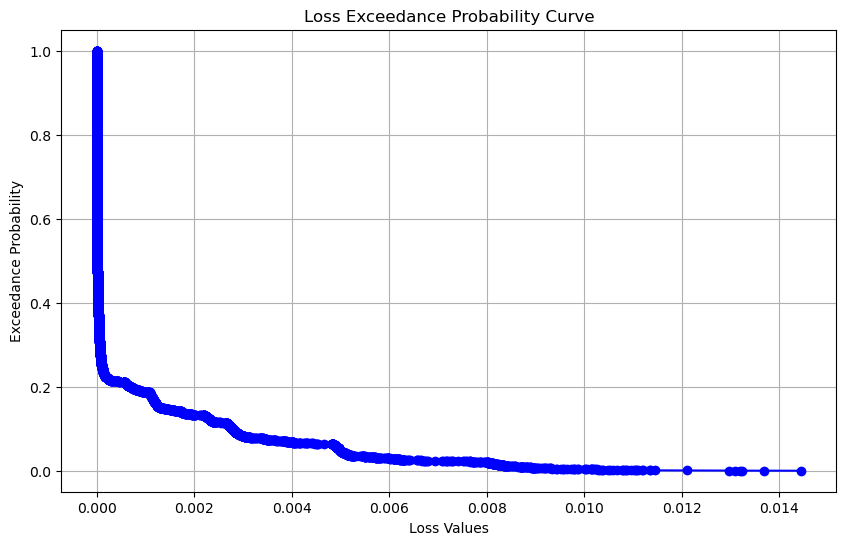

In [106]:
# Plot
# Step 1: Sort the loss values in ascending order
sorted_loss_values = np.sort(total_losses)

# Optional (as proportion of total capital stock)
sorted_loss_values = sorted_loss_values / total_capital_stock

# Step 2: Calculate exceedance probabilities
num_losses = len(total_losses)
exceedance_probabilities = np.arange(1, num_losses + 1) / num_losses

# Step 3: Plot the loss probability graph
plt.figure(figsize=(10, 6))
plt.plot(sorted_loss_values, 1 - exceedance_probabilities, marker='o', linestyle='-', color='b')
plt.xlabel('Loss Values')
plt.ylabel('Exceedance Probability')
plt.title('Loss Exceedance Probability Curve')
plt.grid(True)
# plt.yscale('log')  # Optionally use a logarithmic scale for the y-axis
plt.show()

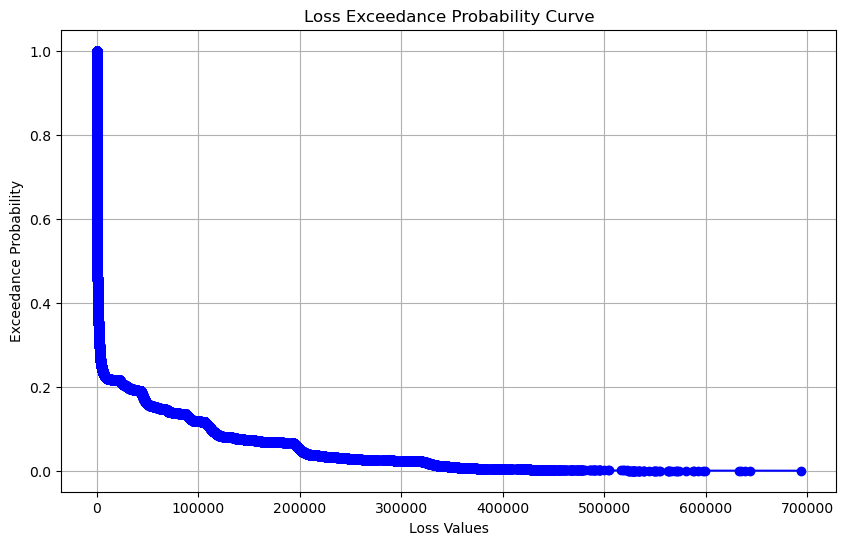

In [12]:
# Plot
# Step 1: Sort the loss values in ascending order
sorted_loss_values = np.sort(total_losses)

## Optional (as proportion of total capital stock)
#sorted_loss_values = sorted_loss_values / total_capital_stock

# Step 2: Calculate exceedance probabilities
num_losses = len(total_losses)
exceedance_probabilities = np.arange(1, num_losses + 1) / num_losses

# Step 3: Plot the loss probability graph
plt.figure(figsize=(10, 6))
plt.plot(sorted_loss_values, 1 - exceedance_probabilities, marker='o', linestyle='-', color='b')
plt.xlabel('Loss Values')
plt.ylabel('Exceedance Probability')
plt.title('Loss Exceedance Probability Curve')
plt.grid(True)
# plt.yscale('log')  # Optionally use a logarithmic scale for the y-axis
plt.show()

In [ ]:
### Inputs for DIGNAD
tradable impact = rl_losses + (rl_losses)

##### Step 2: Calculate dependence between basins

In [115]:
# Test out to make sure the proportional values are correct
np.sort(ifl_losses)

array([    0.        ,     0.        ,     0.        , ...,
       16050.17511771, 16070.47841218, 17394.44985939])